Load the Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("logistics_shipments.csv")
df.head()

,Shipment_ID,Order_Date,Dispatch_Date,Delivery_Date,Expected_Delivery_Date,Customer_ID,Region,City,Carrier,Product_Category,...,Delay_in_Days,Delayed,Delay_Reason,SLA_Breached,Customer_Rating,Return_Requested,Return_Reason,Revenue_USD,Warehouse_ID,Weekday
0,SHP000000,2025-03-26,2025-03-29,2025-04-02,2025-04-02,CUST2424,North,East Nancyberg,UPS,Electronics,...,0,False,Not Applicable,False,5.0,False,Not Requested,282.10,WH_009,Wednesday
1,SHP000001,2025-04-19,2025-04-21,2025-04-26,2025-04-25,CUST7873,North,West Scott,DHL,Electronics,...,1,True,Weather,True,4.5,False,Not Requested,168.48,WH_009,Saturday
2,SHP000002,2024-12-04,2024-12-05,2024-12-12,2024-12-12,CUST3547,Central,North Kristin,LocalCarrier2,Automotive,...,0,False,Not Applicable,False,4.4,False,Not Requested,118.10,WH_005,Thursday
3,SHP000003,2024-12-12,2024-12-15,2024-12-25,2024-12-22,CUST7201,East,Snyderborough,UPS,Furniture,...,3,True,Weather,False,3.3,True,Wrong Product,111.27,WH_002,Wednesday
4,SHP000004,2024-12-25,2024-12-28,2025-01-04,2025-01-04,CUST4733,East,East Alexandermouth,LocalCarrier1,Automotive,...,0,False,Not Applicable,False,4.1,False,Not Requested,66.97,WH_001,Saturday


Understand the shape and structure of the dataset.

In [2]:
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Shipment_ID             15000 non-null  object 
 1   Order_Date              15000 non-null  object 
 2   Dispatch_Date           15000 non-null  object 
 3   Delivery_Date           15000 non-null  object 
 4   Expected_Delivery_Date  15000 non-null  object 
 5   Customer_ID             15000 non-null  object 
 6   Region                  15000 non-null  object 
 7   City                    15000 non-null  object 
 8   Carrier                 15000 non-null  object 
 9   Product_Category        15000 non-null  object 
 10  Shipment_Mode           15000 non-null  object 
 11  Distance_km             15000 non-null  int64  
 12  Weight_kg               15000 non-null  float64
 13  Shipping_Cost_USD       15000 non-null  float64
 14  Delay_in_Days           15000 non-null

In [3]:
#Convert date columns to datetime format for time-based analysis
date_cols = ['Order_Date', 'Dispatch_Date', 'Delivery_Date', 'Expected_Delivery_Date']
df[date_cols] = df[date_cols].apply(pd.to_datetime)

df[date_cols].dtypes

Order_Date                datetime64[ns]
Dispatch_Date             datetime64[ns]
Delivery_Date             datetime64[ns]
Expected_Delivery_Date    datetime64[ns]
dtype: object

In [51]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
df.columns

Index(['Shipment_ID', 'Order_Date', 'Dispatch_Date', 'Delivery_Date',
       'Expected_Delivery_Date', 'Customer_ID', 'Region', 'City', 'Carrier',
       'Product_Category', 'Shipment_Mode', 'Distance_km', 'Weight_kg',
       'Shipping_Cost_USD', 'Delay_in_Days', 'Delayed', 'Delay_Reason',
       'SLA_Breached', 'Customer_Rating', 'Return_Requested', 'Return_Reason',
       'Revenue_USD', 'Warehouse_ID', 'Weekday'],
      dtype='object')

Exploratory Data Analysis (EDA)

In [20]:
#Monthly sales vs return request trend

#Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply Min-Max scaling
monthly[['Revenue_Norm', 'Return_Norm']] = scaler.fit_transform(monthly[['Revenue_USD', 'Return_Requested']])

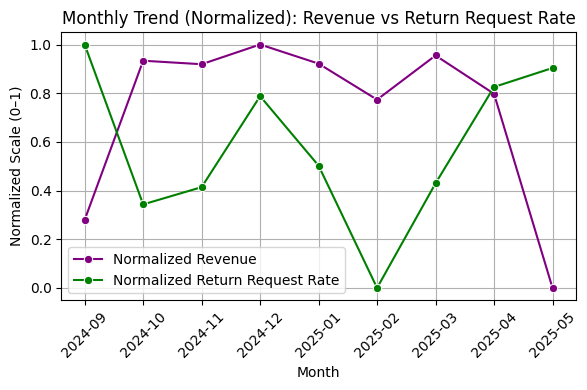

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly['Month'] = monthly['Month'].astype(str)

plt.figure(figsize=(6, 4))
sns.lineplot(data=monthly, x='Month', y='Revenue_Norm', label='Normalized Revenue', marker='o', color='purple')
sns.lineplot(data=monthly, x='Month', y='Return_Norm', label='Normalized Return Request Rate', marker='o', color='green')

plt.title('Monthly Trend (Normalized): Revenue vs Return Request Rate')
plt.xlabel('Month')
plt.ylabel('Normalized Scale (0–1)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Conclusion:
The graph tracks normalized revenue and return request rate from September 2024 to May 2025, highlighting fluctuations and potential correlations between sales and returns over time. Revenue peaked in December 2024 before declining, while return request rates varied, trending upward in May 2025. 


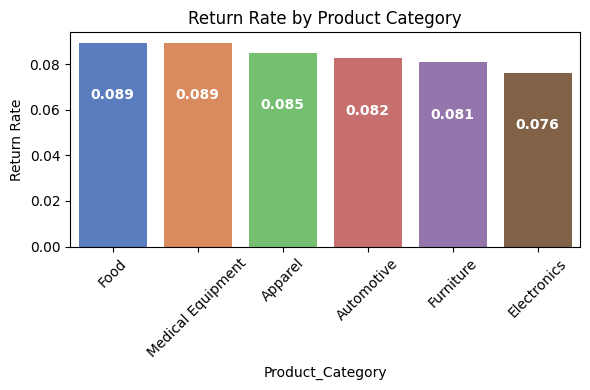

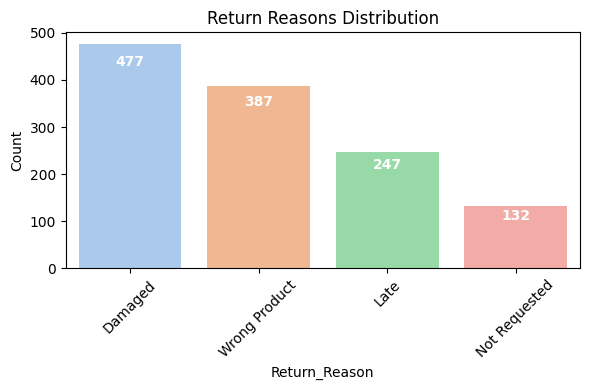

In [49]:
import warnings
warnings.filterwarnings('ignore')

# Return rate by product category s
return_rate = df.groupby('Product_Category')['Return_Requested'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
ax = sns.barplot(x=return_rate.index, y=return_rate.values, palette='muted')
plt.title('Return Rate by Product Category')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height - 0.02,
        f'{height:.3f}',
        ha='center',
        va='top',
        color='white',
        fontweight='bold'
    )

plt.show()

# Return reason distribution
returned_df = df[df['Return_Requested'] == 1]  # Filter only returned orders
return_reason_order = returned_df['Return_Reason'].value_counts().index  # Order categories by frequency
plt.figure(figsize=(6,4))
ax = sns.countplot(data=returned_df, x='Return_Reason', order=return_reason_order, palette='pastel')
plt.title('Return Reasons Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height - (0.05*height), 
        f'{int(height)}',
        ha='center',
        va='top',
        color='white',
        fontweight='bold'
    )

plt.show()

Conclusion:
- Return Rate by Product Category shows Food and Medical Equipment have the highest returns, likely due to perishability and compliance issues.
- Return Reasons Distribution reveals "Damaged" and "Wrong Product" as leading causes, pointing to potential improvements in packaging and order accuracy.


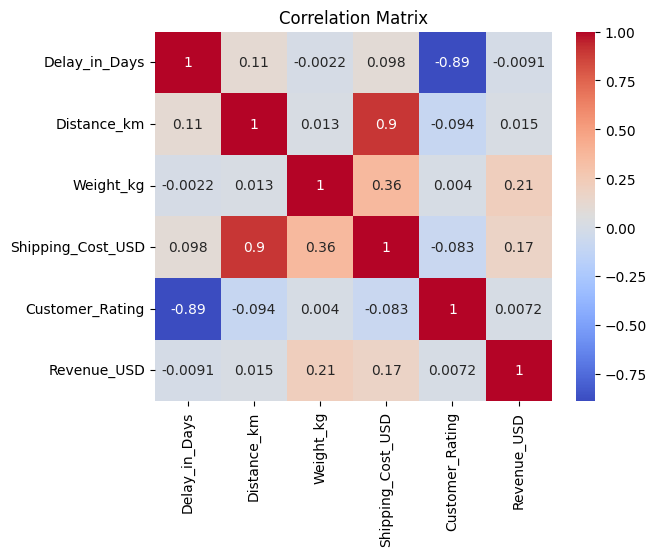

In [50]:
#Correlation matrix (numerical fields)
corr = df[['Delay_in_Days', 'Distance_km', 'Weight_kg', 'Shipping_Cost_USD', 'Customer_Rating', 'Revenue_USD']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Conclusion:
- Strong Positive Correlations: Distance & Shipping Cost (0.9), Weight & Shipping Cost (0.36). (As Expected)
- Strong Negative Correlations: Delay & Customer Rating (-0.89), Distance & Customer Rating (-0.094).
Insights suggest that longer distances and higher weight drive costs, while delays significantly reduce customer satisfaction, offering critical areas for optimization.



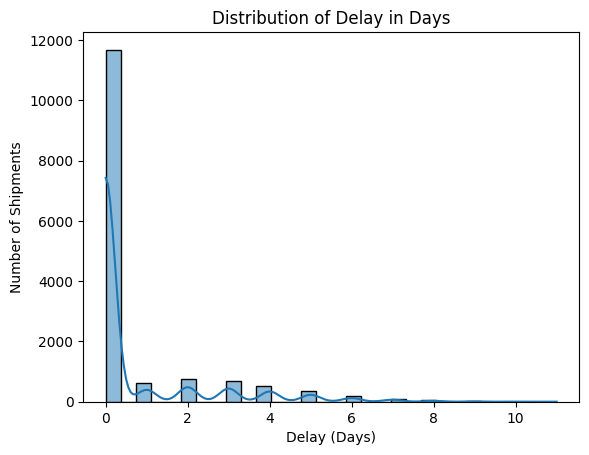

In [25]:
#Distribution of shipment delays
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Delay_in_Days'], bins=30, kde=True)
plt.title("Distribution of Delay in Days")
plt.xlabel("Delay (Days)")
plt.ylabel("Number of Shipments")
plt.show()

Conclusion:
The shipment delay distribution shows that most shipments experience zero delay, while fewer face delays up to 10 days, forming a long-tail pattern. This insight helps in identifying potential areas for logistics improvements and delivery efficiency optimization.


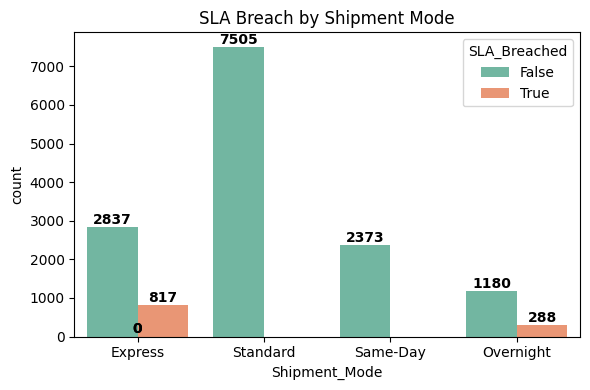

In [26]:
#Shipment Mode vs SLA Breach
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Shipment_Mode', hue='SLA_Breached', data=df, palette='Set2')
plt.title("SLA Breach by Shipment Mode")
plt.tight_layout()


for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  
        height + 5,                     
        f'{int(height)}',             
        ha='center', va='bottom',
        color='black', fontsize=10, fontweight='bold'
    )

plt.show()


Conclusion:
Standard and Overnight shipment modes experience breaches, while Express and Same-Day shipments have zero breaches. This indicates potential optimization needs for Standard and Overnight logistics, improving reliability and customer satisfaction. 


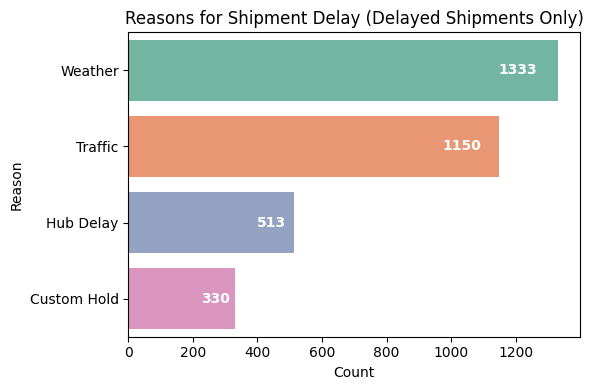

In [52]:
#Shipment Delay vs Reason
df_delayed = df[(df['Delayed'] == True) & (df['Delay_Reason'] != 'Not Applicable')]

plt.figure(figsize=(6,4))
ax = sns.countplot(
    y='Delay_Reason',
    data=df_delayed,
    order=df_delayed['Delay_Reason'].value_counts().index,
    palette='Set2'
)

plt.title("Reasons for Shipment Delay (Delayed Shipments Only)")
plt.xlabel("Count")
plt.ylabel("Reason")

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width - (width * 0.05),  # Slightly left inside bar
        p.get_y() + p.get_height() / 2,
        int(width),
        ha='right',
        va='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

Conclusion:
Weather as the leading cause of delays (1333 cases), followed by Traffic (1150), Hub Delay (513), and Custom Hold (330). These insights highlight key areas for logistics optimization, improving delivery efficiency and minimizing disruptions.

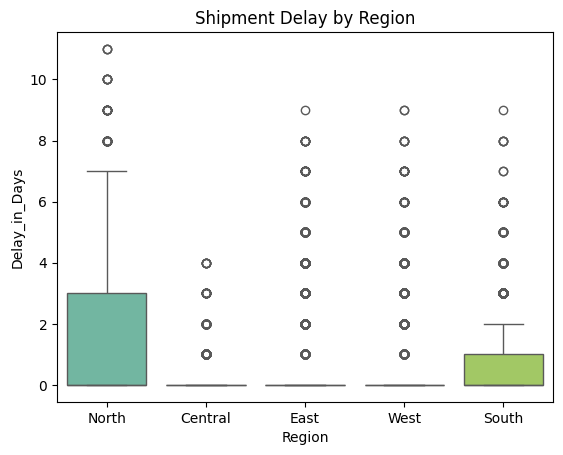

In [53]:
#Regional delays comparison
sns.boxplot(x='Region', y='Delay_in_Days', data=df, palette='Set2')
plt.title("Shipment Delay by Region")
plt.show()


Conclusion:
- North region experiences the highest median delay and widest variability, while the South region has the lowest delays. Central, East, and West regions show minimal delays, with most shipments arriving on time.
- These insights highlight potential logistical challenges in the North, suggesting opportunities for route optimization and improved efficiency


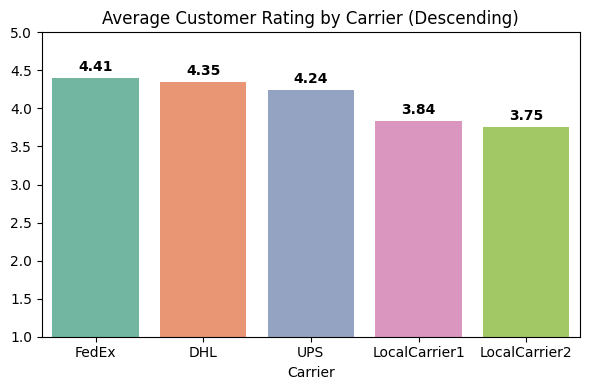

In [56]:
#Group by Customer Rating by Product Category
avg_rating = df.groupby('Carrier')['Customer_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
ax = sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='Set2')
plt.title("Average Customer Rating by Carrier (Descending)")
plt.ylim(1, 5)

# Add data labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.05,  # just above the bar
        f"{height:.2f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()

Conclusion:
Categories with higher ratings likely offer better quality and reliability, while lower-rated categories may have issues related to product quality or service experience. These insights can help refine inventory management, improve customer service strategies, and enhance product offerings for a better overall experience.

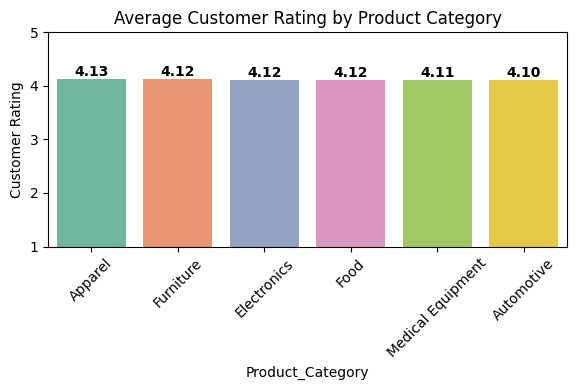

In [60]:
# Calculate average rating per category, sorted in descending order
category_ratings = df.groupby('Product_Category')['Customer_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=category_ratings.index, y=category_ratings.values, palette='Set2')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Average Customer Rating by Product Category")
plt.ylabel("Customer Rating")
plt.ylim(1, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion:
- Apparel (4.13) has the highest rating, followed closely by Furniture, Electronics, and Food (4.12 each). Medical Equipment (4.11) and Automotive (4.10) rank slightly lower, but all categories maintain strong overall ratings. 
- These insights indicate consistent customer satisfaction across categories, with potential for further improvement in lower-rated segments.


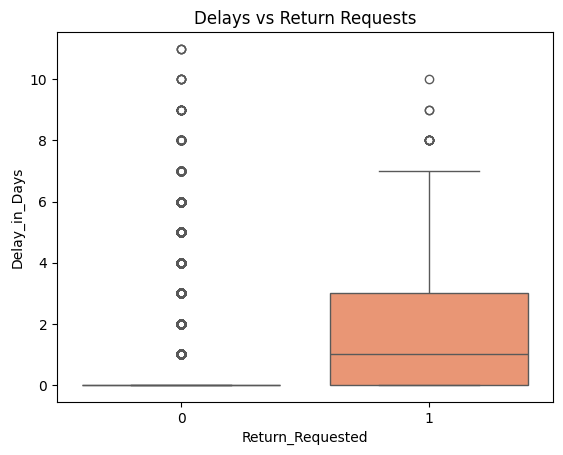

In [59]:
#Return requests vs Delays
sns.boxplot(x='Return_Requested', y='Delay_in_Days', data=df, palette='Set2')
plt.title("Delays vs Return Requests")
plt.show()


Conclusion:
The box plot shows the relationship between shipment delays and return requests:
- No Return Requested → Most shipments have zero delay, with a few outliers reaching up to 11 days.
- Return Requested → Delays are more frequent, with a median of ~2 days, and outliers extending up to 9 days.
This suggests that shipments with return requests tend to experience longer delays, possibly due to handling or resolution processes.


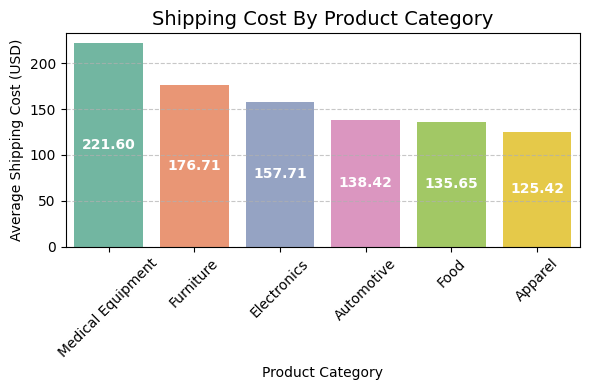

In [58]:
#Group by Shipping Cost by Product Category
gb1 = df.groupby('Product_Category')['Shipping_Cost_USD'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=gb1.index, y=gb1.values, palette='Set2')

plt.title('Shipping Cost By Product Category', fontsize=14)
plt.ylabel('Average Shipping Cost (USD)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels inside bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', color='white', fontsize=10, fontweight='bold'
    )

plt.show()


Conclusion:
Medical Equipment ($221.60) incurs the highest shipping cost, followed by Furniture ($176.71) and Electronics ($157.71). Apparel ($125.42) has the lowest shipping cost, indicating lighter weight and easier handling. These insights can help optimize logistics strategies and cost efficiency for different product categories.

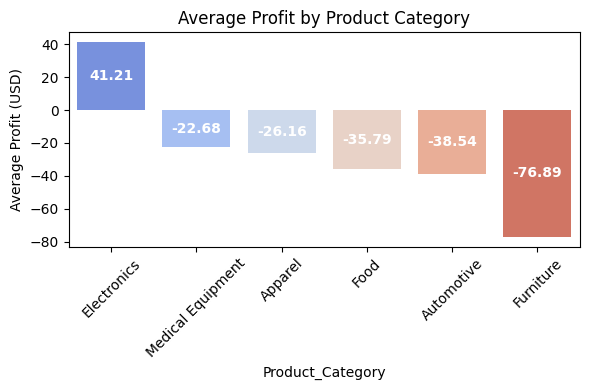

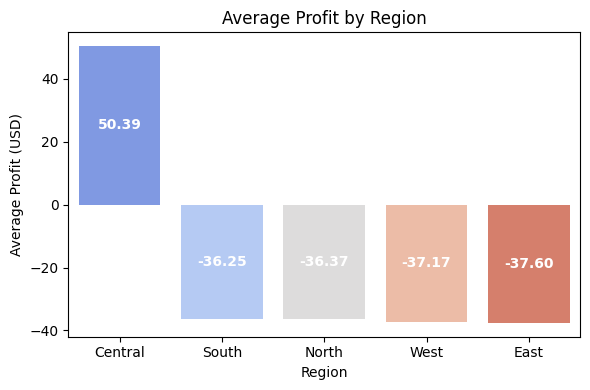

In [57]:
df['Profit'] = df['Revenue_USD'] - df['Shipping_Cost_USD']

# Profit by Product Category
profit_by_category = df.groupby('Product_Category')['Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
ax = sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette='coolwarm')
plt.title('Average Profit by Product Category')
plt.ylabel('Average Profit (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, 
        height/2, 
        f'{height:.2f}', 
        ha='center', va='center', 
        color='white', fontweight='bold'
    )

plt.show()

# Profit by Region
profit_by_region = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
ax = sns.barplot(x=profit_by_region.index, y=profit_by_region.values, palette='coolwarm')
plt.title('Average Profit by Region')
plt.ylabel('Average Profit (USD)')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2, 
        height/2, 
        f'{height:.2f}', 
        ha='center', va='center', 
        color='white', fontweight='bold'
    )

plt.show()


Conclusion:
 - Electronics as the only profitable category ($41.21), while Furniture (-$76.89) has the highest losses, followed by Automotive (-$38.54) and Food (-$35.79). These insights highlight areas for cost optimization, pricing adjustments, and strategic improvements to minimize losses and enhance profitability.
 - Central region (50.39 USD) is the only profitable area, while South (-36.25 USD), North (-36.37 USD), West (-37.17 USD), and East (-37.60 USD) all report losses. These insights highlight a need for regional strategy adjustments to improve profitability across underperforming regions.



Customer Segmentation

In [38]:

df['Order_Date'] = pd.to_datetime(df['Order_Date'])

snapshot_date = df['Order_Date'].max() + pd.Timedelta(days=1)

# Calculate RFM metrics per customer

# Recency
recency = df.groupby('Customer_ID')['Order_Date'].apply(lambda x: (snapshot_date - x.max()).days)

# Frequency
frequency = df.groupby('Customer_ID')['Order_Date'].count()

# Monetary
monetary = df.groupby('Customer_ID')['Revenue_USD'].sum()


rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})
rfm

,Recency,Frequency,Monetary
Customer_ID,,,
CUST1000,17,3,335.49
CUST1001,35,3,414.11
CUST1004,4,1,113.35
CUST1007,19,2,209.46
CUST1008,160,2,211.51
...,...,...,...
CUST9992,76,1,239.68
CUST9993,143,2,191.80
CUST9994,187,1,152.24


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rfm = rfm[rfm['Monetary'] > 0]


#Scale RFM values for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

#Apply KMeans clustering into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_
rfm['Cluster']

Customer_ID
CUST1000    0
CUST1001    0
CUST1004    1
CUST1007    1
CUST1008    3
           ..
CUST9992    1
CUST9993    3
CUST9994    3
CUST9996    3
CUST9997    0
Name: Cluster, Length: 7302, dtype: int32

In [65]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).sort_values(by='Recency')
cluster_summary 

,Recency,Frequency,Monetary
Cluster,,,
2,41.581633,4.309949,627.338253
1,52.573139,1.481608,173.347233
0,65.904928,2.698357,384.875027
3,173.153846,1.259788,161.824136


In [66]:
category_map = {}
for i, cluster in enumerate(cluster_summary.index):
    if i == 0:
        category_map[cluster] = 'Best Customers'
    elif i == 1:
        category_map[cluster] = 'Loyal Customers'
    elif i == 2:
        category_map[cluster] = 'At Risk Customers'
    else:
        category_map[cluster] = 'Lost Customers'
        
# Map clusters to categories
rfm['Category'] = rfm['Cluster'].map(category_map)

# Get counts per category
category_counts = rfm['Category'].value_counts().sort_values(ascending=False)
category_counts

Category
Loyal Customers      2338
Lost Customers       2171
At Risk Customers    2009
Best Customers        784
Name: count, dtype: int64

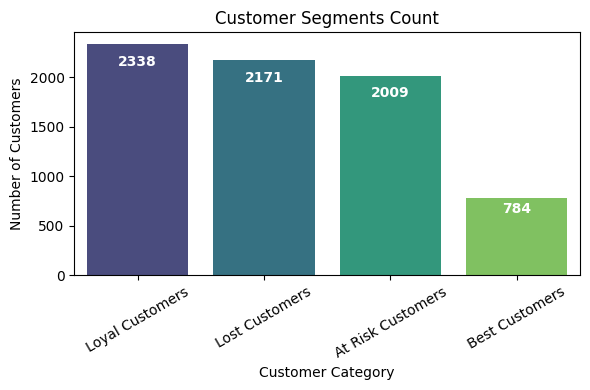

In [67]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Customer Segments Count')
plt.xlabel('Customer Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=30)

# Add data labels inside bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # x position: center of the bar
        height - (0.05 * height),        # y position: slightly below the top of bar
        f'{int(height)}',
        ha='center',
        va='top',
        fontsize=10,
        fontweight='bold',
        color='white'
    )

plt.tight_layout()
plt.show()


Conclusion:
This bar chart categorizes customers into Loyal, Lost, At Risk, and Best Customers, providing a snapshot of customer retention and engagement.
To deepen the analysis, you might:
- Track trends over time: See if the number of lost or at-risk customers is increasing and identify patterns.
- Segment further: Are Best Customers primarily returning users? Are At Risk Customers showing a decline in purchases or engagement?
- Explore influencing factors: What differentiates your Best Customers from At Risk ones? Are there specific products, service interactions, or promotions that impact retention?


In [68]:
rfm_reset = rfm.reset_index()
customer_segments = rfm_reset[['Customer_ID', 'Category']]

# Save to CSV
customer_segments.to_csv('customer_segments.csv', index=False)
print("Customer segmentation saved to 'customer_segments.csv'")


Customer segmentation saved to 'customer_segments.csv'
